<a href="https://colab.research.google.com/github/teslaeco/ChatGpu-/blob/main/Kopia_notatnika_Game_Design_Brainstorming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2024 Google LLC.

In [ ]:
Sebastian Laskowski Project help cosmos LanPlanhelp liveforever

# Nowa sekcja

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Lanet Go to the Lanets
wher?
P
Planets
**Planets Terraforming
**
chees cube 512 places
, standard 64 Easy
512 more logic thing
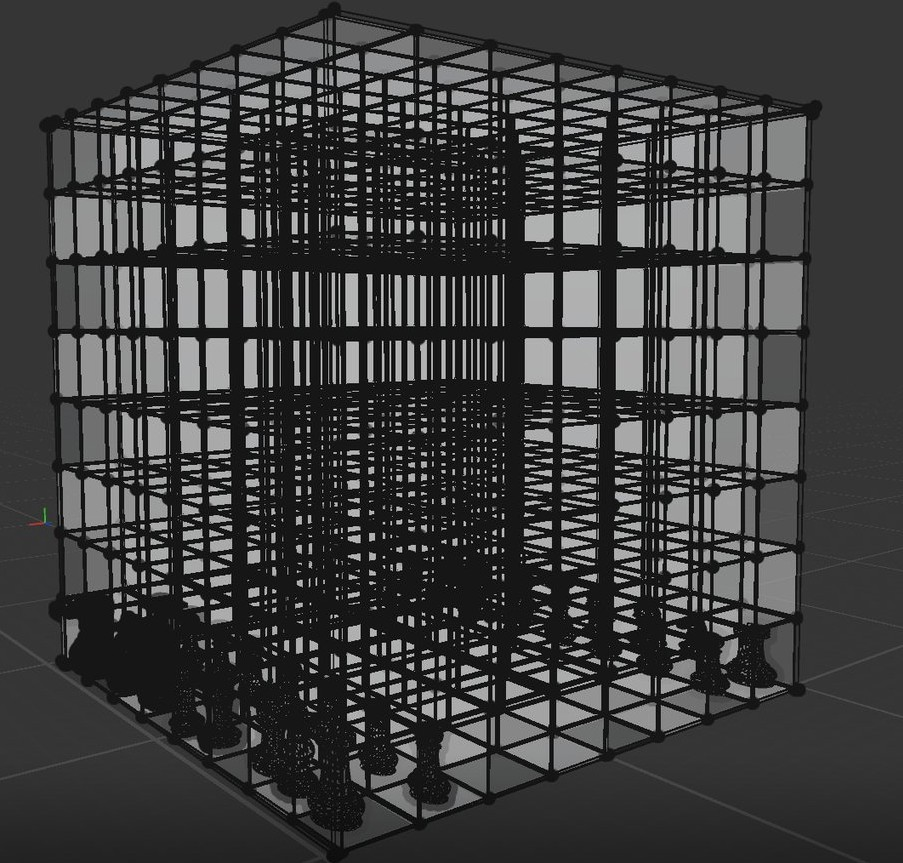


chees cube game
[Gam[tekst linku](https://Planetsterraforming.int)echeescube](https://)gamecubechees.inthttps://aitestkitchen.withgoogle.com/tools/image-fxhamefxaigame


# Nowa sekcja

# Gemma - Game Design Brainstorming

This cookbook illustrates how you can employ the instruction-tuned model version of Gemma as a chatbot to aid in your game design process by fostering brainstorming sessions effectively.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/gemma-cookbook/blob/main/Gemma/Game_Design_Brainstorming.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Setup

### Select the Colab runtime
To complete this tutorial, you'll need to have a Colab runtime with sufficient resources to run the Gemma model. In this case, you can use a T4 GPU:

1. In the upper-right of the Colab window, select **▾ (Additional connection options)**.
2. Select **Change runtime type**.
3. Under **Hardware accelerator**, select **T4 GPU**.


### Gemma setup on Kaggle
To complete this tutorial, you'll first need to complete the setup instructions at [Gemma setup](https://ai.google.dev/gemma/docs/setup). The Gemma setup instructions show you how to do the following:

* Get access to Gemma on kaggle.com.
* Select a Colab runtime with sufficient resources to run the Gemma 2B model.
* Generate and configure a Kaggle username and API key.

After you've completed the Gemma setup, move on to the next section, where you'll set environment variables for your Colab environment.

### Set environment variables

Set environment variables for `KAGGLE_USERNAME` and `KAGGLE_KEY`.

In [ ]:
import os
from google.colab import userdata

os.environ["KERAS_BACKEND"] = "jax"  # Or "tensorflow" or "torch".

# Note: `userdata.get` is a Colab API. If you're not using Colab, set the env
# vars as appropriate for your system.
os.environ["KAGGLE_USERNAME"] = userdata.get("KAGGLE_USERNAME")
os.environ["KAGGLE_KEY"] = userdata.get("KAGGLE_KEY")

### Install dependencies

Install Keras and KerasNLP.

In [ ]:
# Install Keras 3 last. See https://keras.io/getting_started/ for more details.
!pip install -q -U keras-nlp
!pip install -q -U keras

## Core Concept

In [ ]:
# A super concise description of your game
pitch = "In the heart of a reimagined Joseon Dynasty, where steam-powered machines and clockwork contraptions reign supreme, embark on an epic adventure to unravel the mysteries of a forgotten past and shape the destiny of a nation on the brink of revolution."

## Load Model

In [ ]:
import keras
import keras_nlp

# Run at half precision to fit in memory
keras.config.set_floatx("bfloat16")

import textwrap
from IPython.display import Markdown


def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma2_instruct_2b_en")
gemma_lm.compile(sampler="top_k")


class ChatState():
  """
  Manages the conversation history for a turn-based chatbot
  Follows the turn-based conversation guidelines for the Gemma family of models
  documented at https://ai.google.dev/gemma/docs/formatting
  """

  __START_TURN_USER__ = "<start_of_turn>user\n"
  __START_TURN_MODEL__ = "<start_of_turn>model\n"
  __END_TURN__ = "<end_of_turn>\n"

  def __init__(self, model, system=""):
    """
    Initializes the chat state.

    Args:
        model: The language model to use for generating responses.
        system: (Optional) System instructions or bot description.
    """
    self.model = model
    self.system = system
    self.history = []

  def add_to_history_as_user(self, message):
      """
      Adds a user message to the history with start/end turn markers.
      """
      self.history.append(self.__START_TURN_USER__ + message + self.__END_TURN__)

  def add_to_history_as_model(self, message):
      """
      Adds a model response to the history with start/end turn markers.
      """
      self.history.append(self.__START_TURN_MODEL__ + message)

  def get_history(self):
      """
      Returns the entire chat history as a single string.
      """
      return "".join([*self.history])

  def get_full_prompt(self):
    """
    Builds the prompt for the language model, including history and system description.
    """
    prompt = self.get_history() + self.__START_TURN_MODEL__
    if len(self.system)>0:
      prompt = self.system + "\n" + prompt
    return prompt

  def send_message(self, message):
    """
    Handles sending a user message and getting a model response.

    Args:
        message: The user's message.

    Returns:
        The model's response.
    """
    self.add_to_history_as_user(message)
    prompt = self.get_full_prompt()
    response = self.model.generate(prompt, max_length=4096)
    result = response.replace(prompt, "")  # Extract only the new response
    self.add_to_history_as_model(result)
    return result

  def show_history(self):
    for h in self.history:
      print(h)


chat = ChatState(gemma_lm)

## Elaborate with the given core game concept

In [ ]:
result = chat.send_message(
    f"Elaborate about this game with the given core concept below.\n{pitch}"
)
to_markdown(result)

> ##  "The Clockwork Shogun" - A Game of Steam and Secrets
> 
> **Core Concept:**  Imagine the captivating beauty of Joseon, with its traditional aesthetics, interwoven with the technological marvels of the Industrial Revolution. This is the setting for "The Clockwork Shogun," a captivating blend of strategy, exploration, and historical fiction.
> 
> **Gameplay:**  "The Clockwork Shogun" is a blend of multiple genres:
> 
> * **Turn-Based Strategic Gameplay:**  Players take on the role of a young, ambitious official, tasked with navigating a tumultuous Joseon, where the old world clashes with the new. Players must make decisions about resource management, trade, diplomacy, and technological advancement, all within a complex political landscape and the looming threat of revolution.
> * **Exploration and Discovery:**  The game features a vast, detailed map, showcasing the diverse regions of a Joseon transformed by steam power. Players explore these territories, uncovering hidden secrets, encountering unique cultures and factions, and discovering ancient technology long forgotten.
> * **Historical Fiction with a Twist:**  The game weaves in historical events and figures, but with a fantastical twist.  Players will meet characters inspired by historical figures, but with unique abilities and personalities. The narrative will focus on uncovering a long-lost secret, a "Clockwork Shogun" rumored to possess the power to control the very flow of the kingdom's destiny.
> * **Clockwork Mechanics:**  The core of the game's intrigue comes from its unique "Clockwork" mechanics. Players will be able to research, develop and deploy various clockwork devices and inventions. These devices could range from simple automatons and steam-powered machines to complex clockwork weaponry and transportation systems, each offering unique tactical and strategic options.
> 
> **Key Features:**
> 
> * **Deep Political Intrigue:**  Players will navigate the complex web of court politics, forging alliances, manipulating rivals, and making strategic decisions to influence the course of events. 
> * **Unique Character Development:**  Players will develop their characters, choosing their path through the game, impacting their skills, reputation, and alliances.  
> * **Dynamic World:**  The world of the game is in constant flux. Players will need to react to events, making choices that shape the kingdom's future. 
> * **Engaging Narrative:**   Players will uncover the secrets hidden in the game's rich narrative, piecing together clues to unravel the mystery of the Clockwork Shogun. 
> 
> 
> **Target Audience:**
> 
> * Players who enjoy strategy and simulation games.
> * Fans of historical fiction and fantasy settings with a unique twist.
> * Players seeking a captivating narrative filled with political intrigue and exciting discoveries.
> 
> **Thematic Considerations:**
> 
> * **The Conflict Between Tradition and Innovation:**  The game explores the challenges and opportunities presented by the clash between the old ways and the rise of modern technology.
> * **The Power of Knowledge:**  Players will learn about the importance of knowledge and its impact on society, particularly in a world where secrets and technology are key to shaping power.
> * **The Nature of Power:**  The game explores the different forms of power and authority, and the ethical dilemmas faced by those who wield power in different ways.
> 
> 
> **Visuals and Sound:**
> 
> * A visually appealing blend of traditional Joseon aesthetics and steampunk elements. 
> * A dynamic soundtrack that blends traditional Korean instruments with modern, industrial sounds. 
> 
> 
> **Potential Expansion:**
> 
> *  Multiplayer modes, allowing players to compete against each other or cooperate in shaping the future of the kingdom.  
> * A robust crafting and building system, enabling players to create unique clockwork devices and build complex infrastructures.
> 
> 
> "The Clockwork Shogun" has the potential to be a truly engaging and immersive experience.  It blends a fascinating historical setting with a unique and intriguing gameplay experience, offering players a chance to experience the rise and fall of a nation on the brink of revolution. It's not just a game; it's a journey through a world where tradition meets progress, and secrets are buried deep in the heart of an empire reborn. 
> <end_of_turn>

## Main Characters

In [ ]:
result = chat.send_message("Design main characters.")
to_markdown(result)

> Here are a few character concepts to get you started on your "The Clockwork Shogun" cast:
> 
> **Main Protagonist:**
> 
> * **Name:**  Jae-Hyun (or Ji-Hyun if you prefer a less common, slightly more "Korean" name)
> * **Background:**  A young, ambitious official from a noble family, but with a strong sense of justice and a desire to make a real impact on society. Jae-Hyun is skilled in both political maneuvering and technological advancements, but lacks experience in the practical application of his knowledge.
> * **Motivation:**   Jae-Hyun's family has long been on the sidelines of the political power struggles. He sees the opportunity to shape the future of the country through his own actions, driven by a deep belief in his vision for a more equitable and prosperous Joseon. 
> * **Special Ability/Trait:** Jae-Hyun has a natural talent for problem solving, particularly with clockwork devices, allowing him to quickly understand and adapt to new technologies.
> 
> **Supporting Characters:**
> 
> * **Name:** Eun-Seo
> * **Background:**   A talented inventor and clockwork expert, but ostracized for her unorthodox methods and rebellious spirit. She has a deep connection to the "Clockwork Shogun", but refuses to share her knowledge. 
> * **Motivation:** Eun-Seo wants to see her inventions used for good and is hesitant to believe in the potential of the "Clockwork Shogun" for the betterment of the kingdom. 
> *  **Special Ability/Trait:**  She is a gifted engineer and tinkerer, able to create complex clockwork contraptions, including powerful weapons.  She has an uncanny ability to understand and repair even the most complex mechanical devices.  
> 
> * **Name:**  Seung-Woo
> * **Background:**  A cunning and ambitious court advisor, who has a deep understanding of the political landscape of Joseon. He is a master of manipulation and intrigue.
> * **Motivation:**  Seung-Woo is a loyal servant to the current ruling family, but he has his own ambitions. He sees the potential of a revolution and wants to seize power for his own gain.
> * **Special Ability/Trait:** Seung-Woo is an expert in political maneuvering, able to manipulate events to his advantage and sow seeds of doubt and discontent.  He is a master of disguise and deception, able to blend in with any crowd. 
> 
> * **Name:**  Gyeol
> * **Background:**  A wise elder, who has spent his life studying and preserving Joseon's history. He possesses knowledge of ancient technologies, including the legendary "Clockwork Shogun", and is deeply concerned about their rediscovery.
> * **Motivation:**  Gyeol wants to preserve the balance between tradition and progress, but he is also worried about the power the "Clockwork Shogun" holds.
> * **Special Ability/Trait:** Gyeol has an extensive knowledge of ancient texts, including prophecies and forgotten legends. He can offer valuable insights and wisdom to Jae-Hyun and other characters. 
> 
> 
> 
> **Additional Notes:**
> 
> * **Diversity:**  Include characters of different genders, ages, races and backgrounds, reflecting the diverse population of a modern, reimagined Joseon.
> * **Relationships:**  Create relationships and rivalries between these characters, leading to conflicts and opportunities for alliances and betrayal. 
> * **Growth:**  Allow characters to evolve and change over time based on their experiences and choices in the game. 
> 
> 
> 
> Let me know if you'd like to expand on any of these characters or create new ones! I'd be happy to help flesh out your game world further.<end_of_turn>

## Villain Characters

In [ ]:
result = chat.send_message("Design villain characters.")
to_markdown(result)

> Here are some villainous characters for "The Clockwork Shogun," each bringing a different threat to the table:
> 
>  **1. The Iron Shogun:**
> 
> * **Name:**  Won-Jae (meaning “Iron” in Korean)
> * **Background:**  A former noble, disillusioned with the old ways of Joseon, Won-Jae believes technology is the only way to achieve true power. He was a prodigy in clockwork engineering, but his ambition turned to ruthlessness. He sees the "Clockwork Shogun" not as a legend, but as a tool to reshape the world to his own vision of "progress."  
> * **Motivation:**  To establish an iron-fisted regime, using the "Clockwork Shogun" to enforce his will and eliminate any opposition who stand in his way. 
> * **Special Ability/Trait:**  Master strategist and tactician who uses clockwork technology to create a vast network of spies, assassins, and automated defenses to control key regions.
> 
>  **2. The Crimson Empress:**
> 
> * **Name:**  Eun-Ji
> * **Background:**  A cunning and ruthless empress, driven by a thirst for power and control. She sees the potential of the "Clockwork Shogun" not as a tool but as a weapon, a means to dominate and control the entire kingdom for her own ambition.
> *  **Motivation:**  To usurp the throne and establish a tyrannical reign, using the "Clockwork Shogun" to suppress dissent and maintain absolute control. She is a master manipulator, using propaganda and intimidation to keep the people in line.
> * **Special Ability/Trait:** She has a network of informants throughout the kingdom, able to gather information and influence events from within the court, manipulating the populace with subtle propaganda and fear.
> 
>  **3. The Clockwork Cult:** 
> 
> * **Name:**  The Order of the Iron Hand
> * **Background:** A secretive and fanatic group that believes the "Clockwork Shogun" is a divine artifact, destined to bring about a new age of enlightenment. Their members are driven by a fervent belief in their twisted vision of the "Clockwork Shogun's" power. 
> * **Motivation:**  To use the "Clockwork Shogun" to create a utopian society, where technology reigns supreme and traditional beliefs are eradicated. They are willing to sacrifice anyone who stands in their way.
> * **Special Ability/Trait:**  Master manipulators of clockwork technology, using intricate devices to create distractions, manipulate the public and even control individuals. 
> 
> 
>  **Key Considerations for Villain Design:**
> 
> * **Complexity:**  Avoid making villains one-dimensional.  Give them believable motivations, flaws, and internal struggles that contribute to their villainy. 
> * **Consequences:**  Ensure their actions directly impact the protagonist and the world around them.  
> * **Redemption Arc (Potential):** Consider whether any of them have a glimmer of remorse, or even an opportunity for redemption within the narrative.
> 
> 
> By crafting well-rounded villains, "The Clockwork Shogun" can deliver a compelling and engaging experience, pushing players to confront not only external threats, but also the darker side of ambition and technology.  
> 
> 
> 
> I hope these villain characters inspire further creativity and development. 
> <end_of_turn>

## Main Story

In [ ]:
result = chat.send_message(
    "Write the main story of this game with an introduction, development, turn, and conclusion."
)
to_markdown(result)

> Here's a potential storyline for "The Clockwork Shogun" with an introductory arc, core development phases, turning points, and a conclusion. 
> 
> **Introduction:**
> 
> * The game starts in a Joseon, but with a distinct steampunk twist. Steam-powered machines are commonplace, clockwork contraptions are used in everyday life, and whispers of a "Clockwork Shogun" - a mythical figure said to wield immense power - echo through the court.  
> * The player character, Jae-Hyun,  is a bright young official who's eager to prove his worth. He's been tasked with uncovering the mystery of the "Clockwork Shogun" and its potential influence on the kingdom's future. 
> 
> **Development (Core Stages):**
> 
> * **Phase 1: The Rise of the Clockwork:**  Jae-Hyun, through investigation and research, uncovers fragments of a forgotten legend, hinting at a powerful Clockwork Shogun, capable of controlling the very fabric of time and technology. This discovery sparks intrigue and controversy, with some fearing the legend as a harbinger of tyranny. 
>     * Jae-Hyun must balance his desire to learn more about the Clockwork Shogun with concerns over the power it may hold.
>     * The game introduces key allies: Eun-Seo, a brilliant inventor, wary of the legend but drawn to Jae-Hyun's ambition; and Gyeol, an elder steeped in ancient wisdom who warns of the dangers of such power. 
> * **Phase 2: The Court's Divide:** Jae-Hyun's pursuit of the Clockwork Shogun leads him to uncover a plot by Won-Jae, a former noble seeking to exploit the legend for his own power.  He manipulates events to create a power vacuum, aiming to seize control of the nation using the clockwork technology he's developed.
>      *  Jae-Hyun must navigate treacherous court politics, forming alliances while confronting the growing divide between those who see the Clockwork Shogun as a symbol of change and those who fear its implications.
>     *  The Crimson Empress, a powerful empress driven by an ambition to control the kingdom, also becomes a threat, seeking to utilize the Clockwork Shogun for her own ends.
>     *  Players can choose to side with the court, or forge independent alliances. Each path will lead to different outcomes.
> * **Phase 3: The Clockwork War:**  Jae-Hyun must rally allies and utilize both his knowledge of clockwork devices and his diplomatic skills to stop Won-Jae and the Crimson Empress. He discovers the "Clockwork Shogun" isn't just a legend, but a complex machine with immense potential.
>     * Players engage in strategic battles and resource management as they fight to secure control of key technologies, while also managing internal conflicts within Jae-Hyun's own ranks.
>     * A climactic confrontation takes place between Jae-Hyun's faction and Won-Jae, testing their technological mastery and political prowess.
> 
> **Turning Points:**
> 
> * **Discovery of the Clockwork Shogun's True Power:**  A key moment where players realize the Clockwork Shogun isn't merely a weapon, but a complex machine capable of altering the very fabric of reality, forcing a difficult choice about its use. 
> * **The Rise of the Clockwork Cult**: A splinter faction emerges, seeking to use the "Clockwork Shogun" to create a new world order. This introduces a new level of complexity as Jae-Hyun must contend with both external and internal threats. 
> 
> **Conclusion:**
> 
> * Jae-Hyun, having learned from his experiences and allies, must make a final stand.  He must use the "Clockwork Shogun" wisely and make choices about its future. The ending could lead to a restoration of the old ways, a technological utopia, or perhaps a new order entirely.
> 
> **Themes:**
> 
> * **The Balance of Progress and Tradition:** "The Clockwork Shogun" is about finding a harmonious balance between the old and the new, between tradition and technology. 
> * **The Nature of Power:** The game explores the different ways power can be acquired and wielded, and the dangers of absolute control.
> * **The Responsibility of Knowledge:**  Knowledge can be used for good or evil, and the game encourages players to consider its consequences. 
> * **Hope in the Face of Adversity:** Despite the dangers and challenges, there's always hope that even the most powerful machines can be used to create a better future.
> 
> 
> **Remember:** This is just a basic framework.  You can flesh out the story with more details, specific locations, and engaging characters.  The key is to weave a narrative that is both engaging and thought-provoking! 
> 
> 
> Let me know if you want to delve deeper into specific aspects, such as character development, locations, or the mechanics of the game itself.<end_of_turn>

## Show the chat history

In [ ]:
chat.show_history()

<start_of_turn>user
Elaborate about this game with the given core concept below.
In the heart of a reimagined Joseon Dynasty, where steam-powered machines and clockwork contraptions reign supreme, embark on an epic adventure to unravel the mysteries of a forgotten past and shape the destiny of a nation on the brink of revolution.<end_of_turn>

<start_of_turn>model
##  "The Clockwork Shogun" - A Game of Steam and Secrets

**Core Concept:**  Imagine the captivating beauty of Joseon, with its traditional aesthetics, interwoven with the technological marvels of the Industrial Revolution. This is the setting for "The Clockwork Shogun," a captivating blend of strategy, exploration, and historical fiction.

**Gameplay:**  "The Clockwork Shogun" is a blend of multiple genres:

* **Turn-Based Strategic Gameplay:**  Players take on the role of a young, ambitious official, tasked with navigating a tumultuous Joseon, where the old world clashes with the new. Players must make decisions about resou

## Clear History

In [ ]:
chat.history.clear()

## Expansion Idea

### Marketing Phrase

In [ ]:
chat.history.clear()
pitch = "A new steam-powered toothbrush"
result = chat.send_message(
    f"Generate a marketing phrase for the new product below.\n{pitch}"
)
to_markdown(result)

> Here are some marketing phrases for a new steam-powered toothbrush:
> 
> **Highlighting Benefits:**
> 
> * **"Experience the Future of Oral Care: Steam-Powered Clean."**
> * **"Deep Clean. Radiant Smile. Powered by Steam."**
> * **"Unleash the Power of Steam:  A Revolutionary Toothbrush."**
> * **"Say Goodbye to Plaque, Hello to Steam Clean."**
> 
> **Emphasize Technology:**
> 
> * **"The Steam Revolution in Oral Hygiene."**
> * **"Steam Technology:  For a Brighter, Healthier Smile."**
> * **"Introducing the Smart Steam Toothbrush."**
> 
> **Focus on User Experience:**
> 
> * **"The Steam Clean You've Been Dreaming Of."**
> * **"Gentle, Powerful Steam Cleaning for a Spa-like Oral Experience."**
> 
> **Catchy & Creative:**
> 
> * **"Steam Up Your Smile."** 
> * **"Get a Steam Ahead of Plaque."** 
> * **"The Power of Steam:  Cleaning Beyond Compare." **
> 
> 
> **Tips for Selecting:**
> 
> * **Target audience:**  Consider who you are marketing to and what resonates with them.
> * **Brand voice:**  Match the phrase to the overall style and message of your brand.
> * **Keywords:**  Use words that people are likely to search for when looking for a new toothbrush. 
>  
> Remember to test different phrases and analyze their effectiveness to find the best fit for your product launch. 
> <end_of_turn>

### Florist Ideas

In [ ]:
chat.history.clear()
pitch = "Universe and shooting stars"
result = chat.send_message(
    f"Generate a florist idea inspired by the concept below, along with suggestions for suitable flowers.\n{pitch}"
)
to_markdown(result)

> ## Floral Concept: Cosmic Blooms
> 
> **Idea:** A florist that celebrates the wonder and beauty of the cosmos. Imagine an ethereal, celestial experience where customers can find unique arrangements inspired by the stars. 
> 
> **Atmosphere and Design:**
> * **Color Palette:** Deep blues, silvers, purples, golds, and twinkling lights.  
> * **Materials:** Use crystals, star-shaped ornaments, and celestial-themed fabric accents. Consider hanging paper lanterns or creating an "infinity loop" display using hanging floral wire with star-shaped blossoms cascading down.
> * **Scent:** Incorporate subtle scents like vanilla, lavender, or cedarwood that evoke nighttime skies or starry nights.
> * **Music:** Ambient music with celestial soundscapes. 
> 
> **Flower Suggestions:**
> * **Stargazer Lilies:** These dramatic lilies with their starry white and purple blooms are the perfect centerpiece.
> * **Lavender:** A classic symbol of the night, lavender adds a calming, dreamy touch.
> * **White Roses:** Elegant and timeless, white roses are perfect for representing purity and hope.
> * **Purple Irises:** Their deep hues and unique shape evoke the beauty of distant stars. 
> * **Silver Dollar Eucalyptus:** These silvery leaves add a modern touch and create interesting texture. 
> * **White Hydrangeas:**  These elegant hydrangeas symbolize serenity and are perfect for representing the vastness of space. 
> * **Bluebells:**  Small but impactful, these bluebell flowers evoke the twinkling of night skies. 
> 
> **Special Offerings:**
> * **Starlight Bouquet:** A custom-designed bouquet with a unique star motif and a celestial-themed vase.
> * **Cosmic Candle:** Hand-poured scented candles with a celestial scent and packaging inspired by the cosmos.
> * **Celestial Terrariums:** Mini terrariums featuring a variety of starry-themed flowers and miniature planets.
> * **Astrology Readings:**  Collaborate with a local astrologer for personalized readings based on the customer's birth chart and the meaning of their chosen flowers.
> 
> **Overall Experience:**  
> The Cosmic Blooms florist should be an experience, not just a purchase. Encourage customers to share photos of their arrangements on social media using a special hashtag for a chance to be featured. Create a sense of community around the space, perhaps by offering a "Starry Night Workshop" where customers can learn to create their own floral arrangements. 
> 
> 
> 
> 
> <end_of_turn>

### Food Recipe

In [ ]:
chat.history.clear()
pitch = "Cyberpunk Kraken"
result = chat.send_message(
    f"Generate a cooking recipe with the concept below.\n{pitch}"
)
to_markdown(result)

> ## Cyberpunk Kraken Bites - Spicy Squid Ink Dip with Crispy Kraken Tentacles
> 
> This recipe takes inspiration from the mythical cephalopod and cyberpunk aesthetics with a spicy twist. 
> 
> **Yield:** 6 servings
> **Prep Time:** 30 minutes
> **Cook Time:** 15 minutes
> 
> 
> **Ingredients:**
> 
> **For the Spicy Squid Ink Dip:**
> 
> * 8 oz squid ink
> * ½ cup water
> * ¼ cup mayonnaise
> * 2 tablespoons Sriracha
> * 1 tablespoon lemon juice
> * 1 teaspoon black pepper
> * 1 teaspoon salt
> * 1 tablespoon chopped cilantro (optional)
> 
> **For the Crispy Kraken Tentacles:**
> 
> * 1 lb calamari, cleaned and cut into small tentacles
> * 1/2 cup cornstarch
> * 1/4 cup water
> * 1/2 teaspoon salt
> * 1/4 teaspoon black pepper
> * 1 cup all-purpose flour
> * 1/2 teaspoon paprika
> * 1/4 teaspoon garlic powder
> * Vegetable oil for frying
> 
> **Optional Garnish:**
> 
> * Chopped green onions
> * Microgreens
> * Smoked Paprika Dust
> 
> **Instructions:**
> 
> **1. Prepare the Squid Ink Dip:**
>    * In a small saucepan, whisk together squid ink, water, mayonnaise, Sriracha, lemon juice, pepper, and salt until smooth. 
>    * Bring the mixture to a simmer over medium heat, stirring occasionally.  
>    * Continue to simmer for 5 minutes, stirring occasionally, until the mixture slightly thickens.
>    * Remove from heat and stir in cilantro (if using). 
>    * Set aside until ready to serve.
> 
> **2. Prepare the Kraken Tentacles:**
>    * In a shallow dish, combine corn starch, water, salt, and pepper. 
>    * In another shallow dish, combine all-purpose flour, paprika, and garlic powder. 
>    * Dip the calamari tentacles into the cornstarch mixture, allowing the excess to drip off.
>    * Dredge the tentacles in the flour mixture, ensuring a good coating on all sides.
>    * Heat about 2 inches of oil in a deep skillet over medium-high heat to 350°F (175°C). 
>    * Gently place the tentacles into the hot oil, working in batches to avoid overcrowding. 
>    * Fry until golden brown and crispy, about 2-3 minutes per side.
>    * Carefully remove the tentacles from the oil and drain on paper towels.
> 
> **3. Assemble and Serve:**
>    * Arrange the crispy kraken tentacles on a platter. 
>    * Serve the spicy squid ink dip alongside the tentacles, garnished with chopped green onions, microgreens, or a sprinkle of smoked paprika dust. 
> 
> 
> **Cyberpunk Flair:**
> 
> * Serve the dish in black metal-themed bowls for a futuristic feel. 
> * Use neon lighting to highlight the squid ink dip. 
> * Incorporate cyberpunk-inspired edible decorations such as LED lights in the tentacles or glow-in-the-dark sprinkles for the dip. 
> 
> 
> 
> This recipe is a playful interpretation of the cyberpunk theme, offering a unique and exciting culinary experience. Remember to enjoy the vibrant colours, bold flavors, and futuristic presentation!<end_of_turn>